In [1]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle
from pyprismatic.process import calc_aberration, calc_defocus_aberration

In [2]:
try:
    from papuc.example_maps import colormaps
    cmap_papuc = colormaps['default']
    x_i = np.linspace(-1*np.pi,np.pi,255)
    y_i = cmap_papuc(x_i, np.ones(255))
    my_map = mpl.colors.LinearSegmentedColormap.from_list(name="papuc", colors=y_i)
except ModuleNotFoundError:
    print("papuc not installed. Using HSV colormap.")
    cmap_hsv = plt.cm.get_cmap("hsv")
    x_i = np.linspace(0,1,255)
    y_i = np.roll(cmap_hsv(x_i), 255//2, axis=0)
    my_map = mpl.colors.LinearSegmentedColormap.from_list("hsv_shifted", colors=y_i)

In [3]:
w_lambda = 0.019687487 # angstrom, 300kV
r_max = 1.0
qx = np.linspace(0,4*r_max,1000)
qy = np.linspace(0,4*r_max,1000)

qxa, qya = np.meshgrid(qx,qy)
qxa = qxa-2*r_max
qya = qya-2*r_max
q = np.sqrt(qxa**2.0 + qya**2.0)
qTheta = np.arctan2(qya,qxa)

In [4]:
abb_defocus = np.real(calc_defocus_aberration(q=q, qTheta=qTheta, lmb=w_lambda, C1=25))
abb_sphere = np.real(calc_aberration(coef=np.array([[4,0,3e6,0]]), q=q, qtheta=qTheta, lmb=w_lambda))
abb_3stig = np.real(calc_aberration(coef=np.array([[3,3,8e4,10]]), q=q, qtheta=qTheta, lmb=w_lambda))
abb_coma = np.real(calc_aberration(coef=np.array([[3,1,1.25e5,-45]]), q=q, qtheta=qTheta, lmb=w_lambda))

funky = np.array([[4,0,3e5,0],[3,3,8e4,10],[3,1,1e4,-45],[2,0,2e3,0],[4,4,2e6,5]])
abb_funky = np.real(calc_aberration(coef=funky, q=q, qtheta=qTheta, lmb=w_lambda))

In [5]:
p_sphere = np.mod(abb_sphere, 2*np.pi)
p_3stig = np.mod(abb_3stig, 2*np.pi)
p_coma = np.mod(abb_coma, 2*np.pi)
p_funky = np.mod(abb_funky, 2*np.pi)

In [6]:
p_sphere_m = np.ma.masked_where(np.abs(q) > 2*r_max, p_sphere)
p_3stig_m = np.ma.masked_where(np.abs(q) > 2*r_max, p_3stig)
p_coma_m = np.ma.masked_where(np.abs(q) > 2*r_max, p_coma)
p_funky_m = np.ma.masked_where(np.abs(q) > 2*r_max, p_funky)

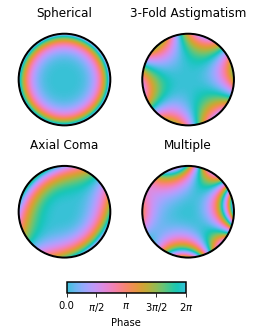

In [7]:
fig, axes = plt.subplots(2,2,figsize=(3.4,4.5), constrained_layout=True)

axes[0,0].set_title("Spherical")
axes[0,1].set_title("3-Fold Astigmatism")
axes[1,0].set_title("Axial Coma")
axes[1,1].set_title("Multiple")

axes[0,0].pcolormesh(qxa, qya, p_sphere_m, cmap=my_map, shading="nearest", vmin=0, vmax=2*np.pi)
axes[0,1].pcolormesh(qxa, qya, p_3stig_m, cmap=my_map, shading="nearest", vmin=0, vmax=2*np.pi)
cim = axes[1,0].pcolormesh(qxa, qya, p_coma_m, cmap=my_map, shading="nearest", vmin=0, vmax=2*np.pi)
axes[1,1].pcolormesh(qxa, qya, p_funky_m, cmap=my_map, shading="nearest", vmin=0, vmax=2*np.pi)

for axe in axes:
    for ax in axe:
        circ = Circle((0, 0), 2*r_max, facecolor="None", edgecolor='black', lw=2, zorder=10)
        ax.add_patch(circ)
        ax.axis('off')
        ax.set_aspect('equal')
        ax.set_xlim(-2.5,2.5)
        ax.set_ylim(-2.5,2.5)
        ax.set_xticks([])
        ax.set_yticks([])

    
cax = fig.colorbar(cim, ax=axes.ravel().tolist()[-2:], orientation="horizontal", shrink=0.5, aspect=7)
cax.set_ticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
cax.set_ticklabels(["0.0", "$\pi / 2$", "$\pi$", "3$\pi / 2$", "$2\pi$"])
cax.set_label("Phase")
cax.outline.set_linewidth(1.5)